In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df1 = pd.read_csv(
    "/Users/akseljoonas/Documents/mlfortnight/data/raw/train.csv"
)
df = pd.read_csv(
    "/Users/akseljoonas/Documents/mlfortnight/data/processed/cbrt_features.csv"
)
df["measurement_time"] = df1["measurement_time"]

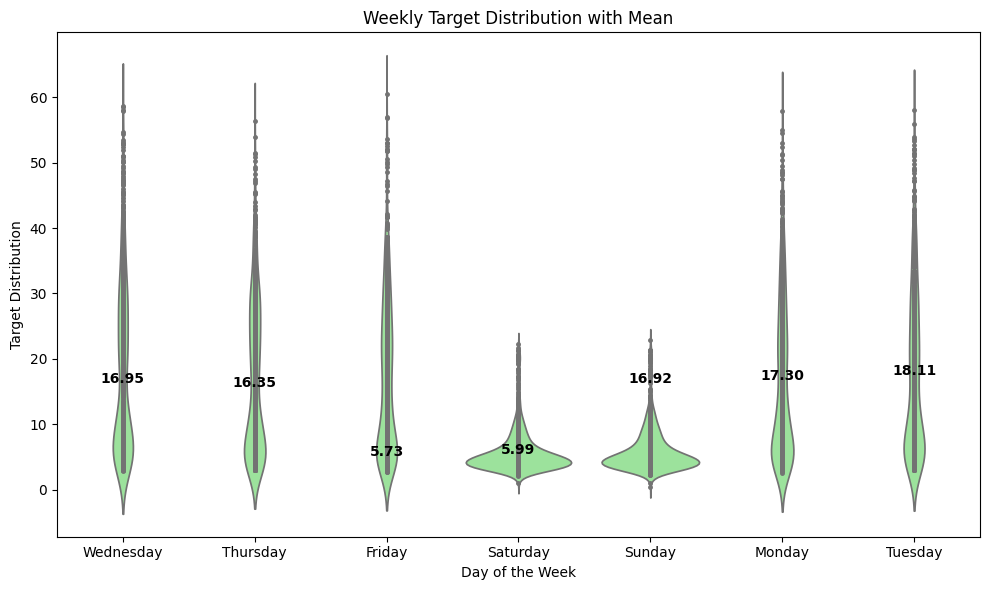

In [36]:
# Convert 'measurement_time' to datetime and extract the day of the week
df["measurement_time"] = pd.to_datetime(df["measurement_time"])
df["day_of_week"] = df["measurement_time"].dt.day_name()


# Create a figure for the weekly target distribution plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the weekly target distribution using a violin plot
sns.violinplot(
    x="day_of_week", y="target", data=df, ax=ax, inner="point", color="lightgreen"
)

# Calculate and annotate the mean of the target for each day
means = df.groupby("day_of_week")["target"].mean()

for i, mean in enumerate(means):
    ax.text(
        i,
        mean,
        f"{mean:.2f}",
        color="black",
        ha="center",
        va="center",
        fontweight="bold",
    )

ax.set_xlabel("Day of the Week")
ax.set_ylabel("Target Distribution")
ax.set_title("Weekly Target Distribution with Mean")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

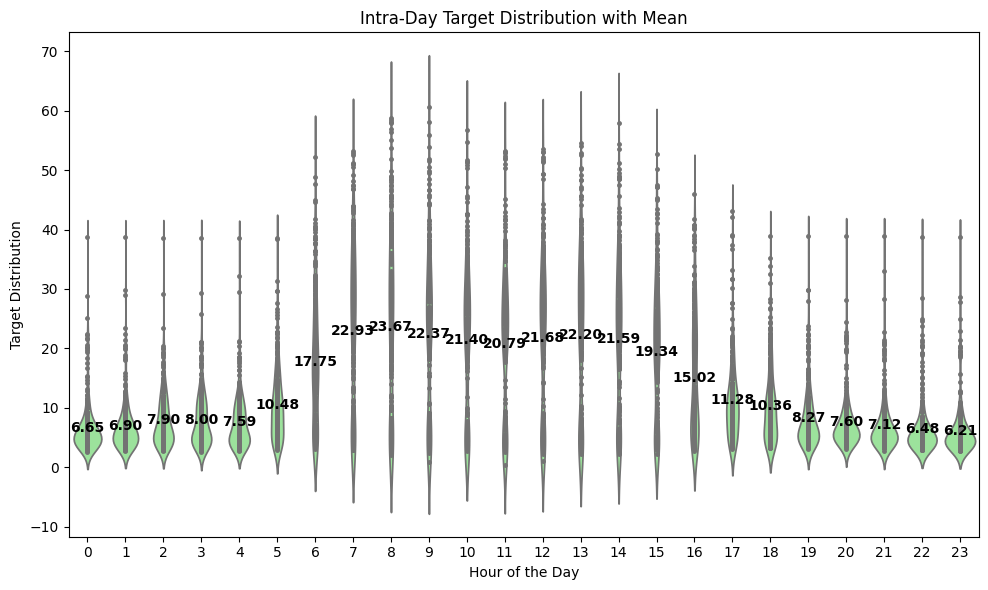

In [37]:
# Convert 'measurement_time' to datetime and extract the hour of the day
df["measurement_time"] = pd.to_datetime(df["measurement_time"])


df["hour_of_day"] = df["measurement_time"].dt.hour




fig, ax = plt.subplots(figsize=(10, 6))


sns.violinplot(
    x="hour_of_day", y="target", data=df, ax=ax, inner="point", color="lightgreen"
)

# Calculate and annotate the mean of the target for each hour
means = df.groupby("hour_of_day")["target"].mean()
for i, mean in enumerate(means):
    ax.text(
        i,
        mean,
        f"{mean:.2f}",
        color="black",
        ha="center",
        va="center",
        fontweight="bold",
    )

ax.set_xlabel("Hour of the Day")
ax.set_ylabel("Target Distribution")
ax.set_title("Intra-Day Target Distribution with Mean")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()